In [12]:
# Importando as bibliotecas NumPy e Pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importando a base de dados de infrações de trânsito no mês de julho de 2020
db = pd.read_csv('julho.csv', sep=';')

In [ ]:
# Verificando o cabeçalho do arquivo
db.head()

In [3]:
# Avaliando o tamanho do arquivo
db.shape

(9752, 13)

In [5]:
# Avaliando os tipos de dados do dataframe
db.dtypes

tipo_infracao               object
descricao                   object
tipo_infrator               object
tipo_veiculo                object
cometimento                 object
hora_cometimento            object
auinf_local_rodovia         object
auinf_local_km             float64
auinf_local_referencia      object
auinf_local_complemento     object
auinf_local_latitude        object
auinf_local_longitude       object
grav_tipo                   object
dtype: object

In [ ]:
# Ao avaliar os tipos de dados, já se nota uma necessidade: alterar o tipo de dado da coluna "cometimento" de object (string) para data
db["cometimento"] = pd.to_datetime(db["cometimento"])

In [ ]:
# Verificando se a transformação de tipos de dados ocorreu
db.dtypes

In [ ]:
# Uma vez que uma das questões do problema é obter o número de infrações diárias, já vou criar uma coluna para separar o dia. Foi necessário pedir para filtrar pelo mês, em função do formato da data.
db["dia_cometimento"] = (db["cometimento"].dt.month)

In [ ]:
# Verificando se a coluna foi criada
db.dtypes

In [ ]:
db.tail(20)

In [ ]:
# Verificando a existência de valores nulos
db.isnull().sum()
#Verifica-se que há dados faltantes em algumas colunas, principalmente nos dados do local de cometimento da infração.

In [ ]:
# Avaliando a quantidade de infrações de cada tipo
db["grav_tipo"].value_counts(ascending=True)

Gravíssima     430
Grave          712
Leve           998
Média         2746
Name: grav_tipo, dtype: int64

In [ ]:
# Avaliando o número de infrações diárias
db.groupby("dia_cometimento")["tipo_infracao"].count()

Text(0, 0.5, 'Total')

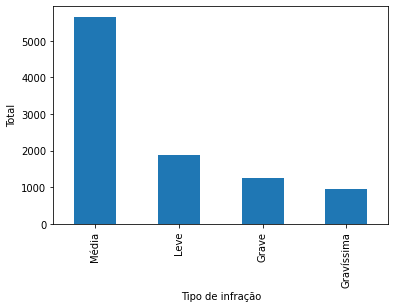

In [13]:
# Montando gráfico de barras com o número de infrações por tipo
db["grav_tipo"].value_counts().plot.bar()
plt.xlabel("Tipo de infração")
plt.ylabel("Total")

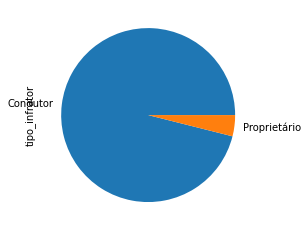

In [14]:
# Para uma visualização geral e mais rápida dos dados de tipo de infrator, será construído um gráfico de pizza.
db["tipo_infrator"].value_counts().plot.pie()

Text(0, 0.5, 'Total')

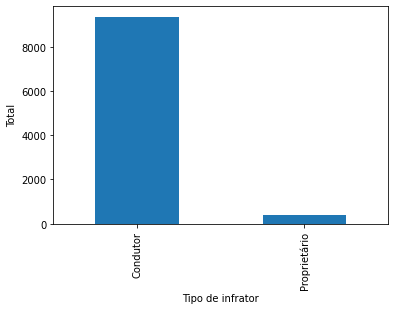

In [17]:
# Para a visualização do total de infratores por tipo, será construído um gráfico de barras verticais. O ideal seria realizar um corte no eixo Y, para diminuir a diferença de escala, mas ainda não sei fazer isso.
db["tipo_infrator"].value_counts().plot.bar()
plt.xlabel("Tipo de infrator")
plt.ylabel("Total")